In [1]:
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

sys.path.append(r"C:\Users\Mike\OneDrive\Project\sdtools")
sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))
sys.path.append(r'C:\Users\mikek\OneDrive\Project\python-packages')

# from gridtools.hypnotoad_tools import *
# from gridtools.b2_tools import *
# from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *


%load_ext autoreload
%autoreload 2


print("Done")

Done


In [4]:
db = CaseDB()

toload = {
    "vis4" : "sta11d-ar4pc",
    "vis" : "sta11a-ion_viscosity",
    "vis1" : "sta11b-ar1pc",
    "vis2" : "sta11c-ar2pc",
    
    # "0" : "sta10a-bestshot",
    # "1" : "sta10b-ar1pc",
    # "2" : "sta10c-ar2pc",
    # "4" : "sta10d-ar4pc",
    
    # "minmod_newcurve" : "stc5b-ar4pc"
    }

cs = dict()   # casestore

for name in toload:
    print(f"Loading {toload[name]}")
    cs[name] = Load.case_1D(rf"C:\Users\mikek\OneDrive\Project\collab\tech\cases\step1d\{toload[name]}")


Loading sta11d-ar4pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta11a-ion_viscosity


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta11b-ar1pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta11c-ar2pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


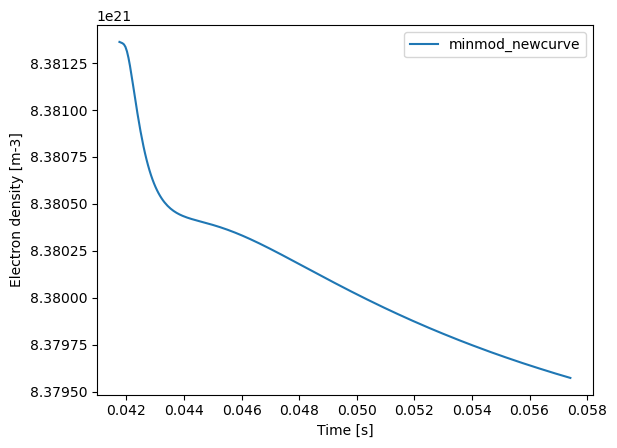

In [6]:
fig, ax = plt.subplots()

for name in toload:

    ds = cs[name].ds

    pcount = ((ds["Ne"] + ds["Nd"])*ds["dy"] * ds["J"]).sum("pos")

    pcount.plot(ax = ax, label = name)
    
ax.legend()

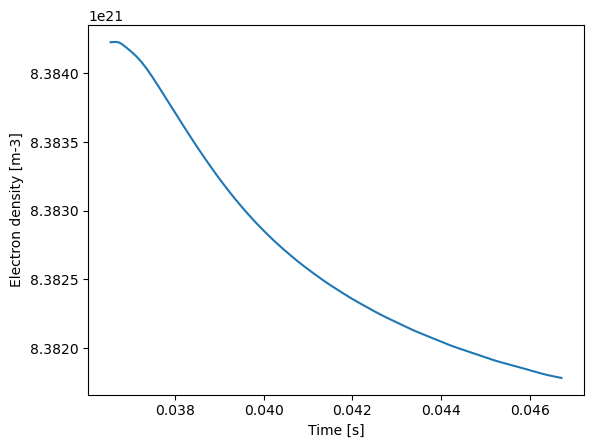

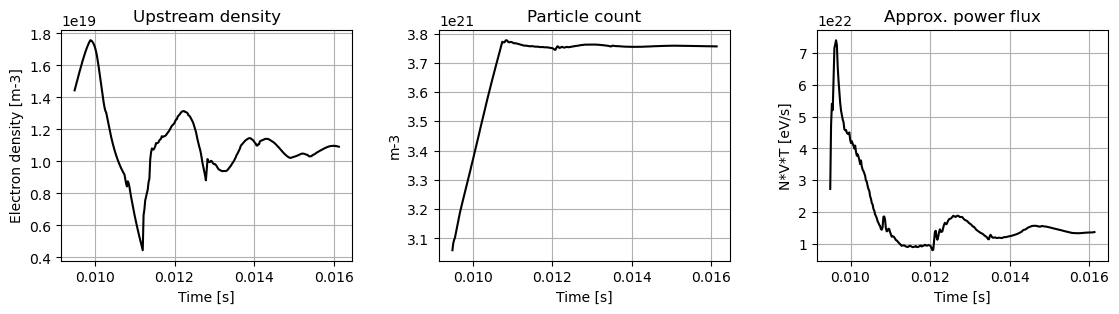

In [54]:

ds = cs["8a"].ds.isel(pos=slice(2,-1), t = slice(2,None))

particle_count = ((ds["Ne"] + ds["Nd"])*ds["dv"]).sum("pos")
nu = ds["Ne"].isel(pos=0)

fig, axes = plt.subplots(1,3, figsize=(4.5*3, 3))
fig.subplots_adjust(wspace=0.3)
nu.plot(ax = axes[0], c = "k")
# (particle_count/particle_count.isel(t=0)).plot(ax = axes[1], c = "k")
particle_count.plot(ax = axes[1], c = "k")
pflux = (ds["Vd+"] * ds["Nd+"] * ds["Td+"]).isel(pos=-1).plot(ax = axes[2], c = "k")

# pflux.plot(ax=axes[2])

axes[0].set_title("Upstream density")
# axes[1].set_title("Fractional particle count")
axes[1].set_title("Particle count")
axes[2].set_title("Approx. power flux")
axes[2].set_ylabel("N*V*T [eV/s]")
axes[1].set_ylabel("m-3")
# axes[2].set_yscale("log")

for ax in axes:
    ax.grid()
